Problem 6

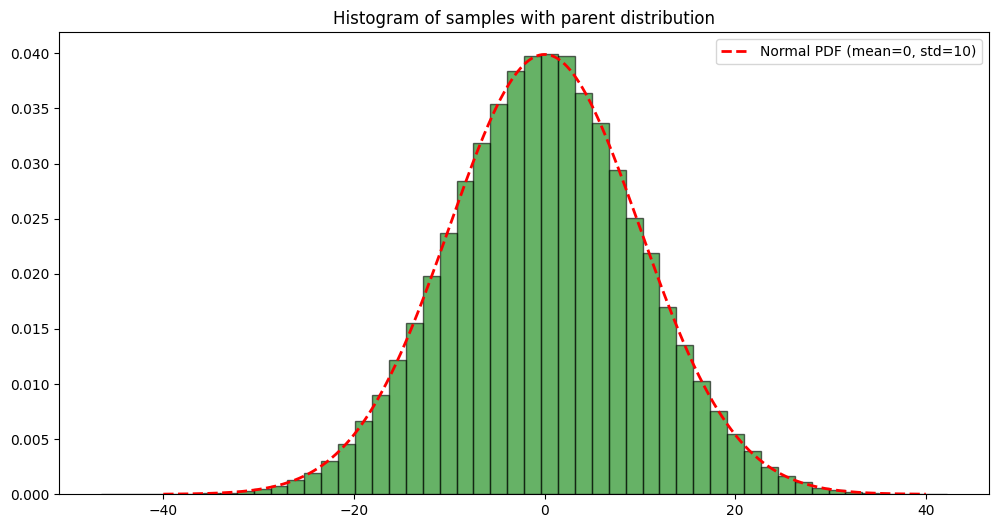

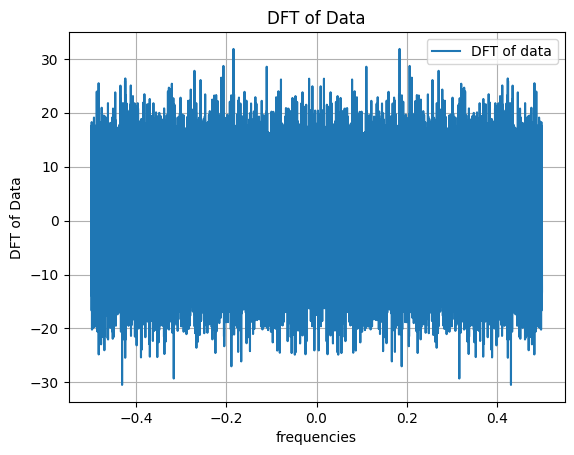

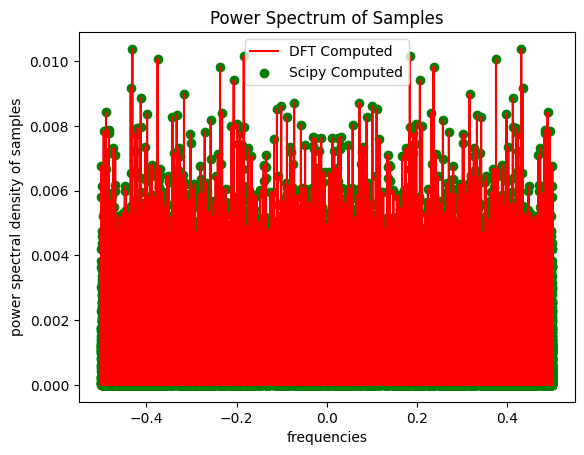

Max of K = 0.49999000000000005
Min of K = -0.5


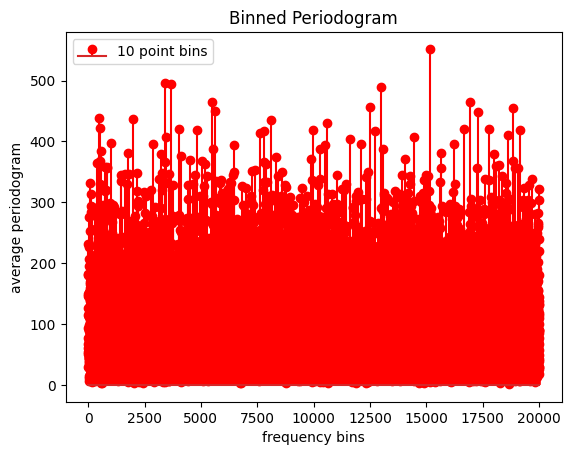

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps

mean = 0
std_dev = 10
num_samples = 100000
random_numbers = np.random.normal(mean, std_dev, num_samples)

# a)
plt.figure(figsize=(12, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
normal_pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
plt.plot(x, normal_pdf, 'r--', linewidth=2, label='Normal PDF (mean=0, std=10)')
plt.title('Histogram of samples with parent distribution')
plt.legend()
plt.show()

# b)
#dft computation 
data_dft= np.fft.fftshift(np.fft.fft(random_numbers,norm ='ortho'))
k = np.fft.fftshift(np.fft.fftfreq(len(random_numbers)))
plt.plot(k,data_dft,label='DFT of data')
plt.title("DFT of Data")
plt.xlabel("frequencies")
plt.ylabel("DFT of Data")
plt.legend()
plt.grid()
plt.show()

# compute pow spec using dft
spec = (1.0/len(random_numbers))*np.absolute(data_dft)**2.0
plt.plot(k,spec,label = 'DFT Computed',color='red')
plt.title('Unbinned Periodogram')
plt.xlabel('frequencies')
plt.ylabel('periodogram')
plt.legend()
# computes using scipy
sci_pow_spec = sps.periodogram(random_numbers,scaling = 'spectrum',return_onesided = False)
plt.scatter(sci_pow_spec[0],sci_pow_spec[1],color = 'green',label = 'Scipy Computed')
plt.title('Power Spectrum of Samples')
plt.xlabel('frequencies')
plt.ylabel('power spectral density of samples')
plt.legend()
plt.show()

# c)

print('Max of K =',np.max(k))
print('Min of K =',np.min(k))

# d)

def calc_pow_spec(random_numbers):
    dft = np.fft.fftshift(np.fft.fft(random_numbers,norm = 'ortho'))
    val = np.mean(np.absolute(dft)**2.0)
    return val

data_bin = np.zeros(shape = (20000,5),dtype = np.float64)
binned_pow_spec = np.zeros(20000,dtype = np.float64)


k1 = 0
for i in range(len(data_bin)):
    for j in range(5):
        data_bin[i][j] = random_numbers[k1]
        k1 = k1+1
        if(k1 == len(random_numbers)):
            break
            
for i in range(len(data_bin)):
    binned_pow_spec[i] = calc_pow_spec(data_bin[i])
plt.stem(np.linspace(0.0,len(binned_pow_spec),len(binned_pow_spec)),binned_pow_spec,linefmt = ('-','red'),label = "10 point bins")
plt.title('Binned Periodogram')
plt.xlabel("frequency bins")
plt.ylabel("average periodogram")
plt.legend()
plt.show()

e)

FFT on unbinned data from a normal distribution, the resulting power spectrum should display a flat profile, reflecting the characteristic of white noise where all frequencies have approximately equal power.
 
By averaging the power spectrum over bins,the influence of random fluctuations or noise is diminished, making it easier to detect consistent patterns or signals in the data. This smoothing effect aids in identifying any significant frequency components that may stand out from the background noise.Binned data enhances the ability to uncover dominant frequencies or trends while mitigating the impact of noise, ultimately leading to a clearer interpretation of the power spectrum.